Data Analysis to identify the customers who have a higher probability of purchasing the loan.
To find a high-performance predictive model using machine learning

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
dd=pd.read_csv("C:\\Users\\HP\\Desktop\\DA-Python\\UniversalBank.csv")

In [89]:
dd.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [90]:
dd.shape

(5000, 14)

In [91]:
dd.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [92]:
dd.isnull().any()

ID                    False
Age                   False
Experience            False
Income                False
ZIP Code              False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Personal Loan         False
Securities Account    False
CD Account            False
Online                False
CreditCard            False
dtype: bool

In [93]:
dd.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [94]:
dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


Found number of NaNs in the data and no missing value.

In [95]:
dd.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [96]:
dd.drop(['ZIP Code'],inplace=True,axis=1)
dd.columns

Index(['ID', 'Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

In [97]:
dd.describe()

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [98]:
aa=dd["Personal Loan"].value_counts()
aa

0    4520
1     480
Name: Personal Loan, dtype: int64

480 people get loan

# Data Visualization

<AxesSubplot:ylabel='Personal Loan'>

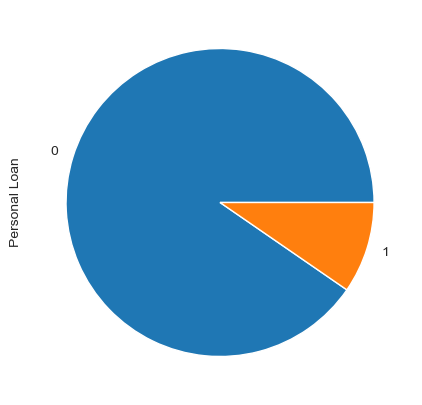

In [99]:
aa.plot.pie(y="mass",figsize=(5,5))

Here found ones as loaned and zeros as not loaned in target column.

D:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Family', ylabel='count'>

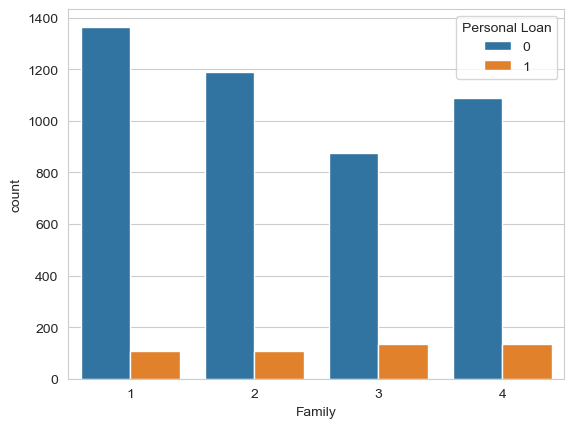

In [100]:
sns.countplot(dd["Family"],hue=dd["Personal Loan"])

D:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Education', ylabel='count'>

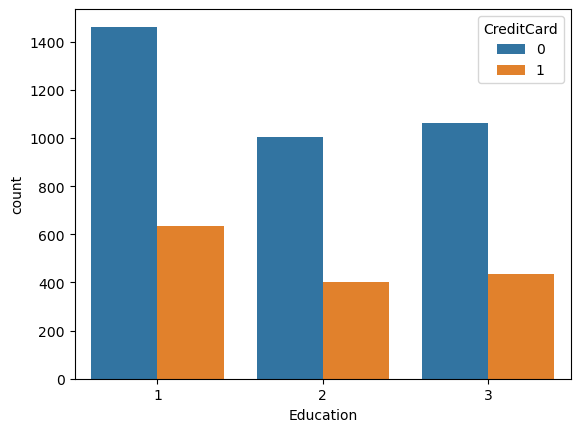

In [16]:
sns.countplot(dd["Education"],hue=dd["CreditCard"])

1 (Undergraduate) customera take loan than 2 (graduate) and 3 (postgraduate)

In [17]:
corr=dd.corr();corr

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
Family,-0.016797,-0.046418,-0.052563,-0.157501,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.016972,-0.000436,-0.001232,-0.002616,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028


In [18]:
corr['Personal Loan'].sort_values(ascending=False)

Personal Loan         1.000000
Income                0.502462
CCAvg                 0.366889
CD Account            0.316355
Mortgage              0.142095
Education             0.136722
Family                0.061367
Securities Account    0.021954
Online                0.006278
CreditCard            0.002802
Experience           -0.007413
Age                  -0.007726
ID                   -0.024801
Name: Personal Loan, dtype: float64

Correlation between target var(personal loan) and independent variables

<AxesSubplot:>

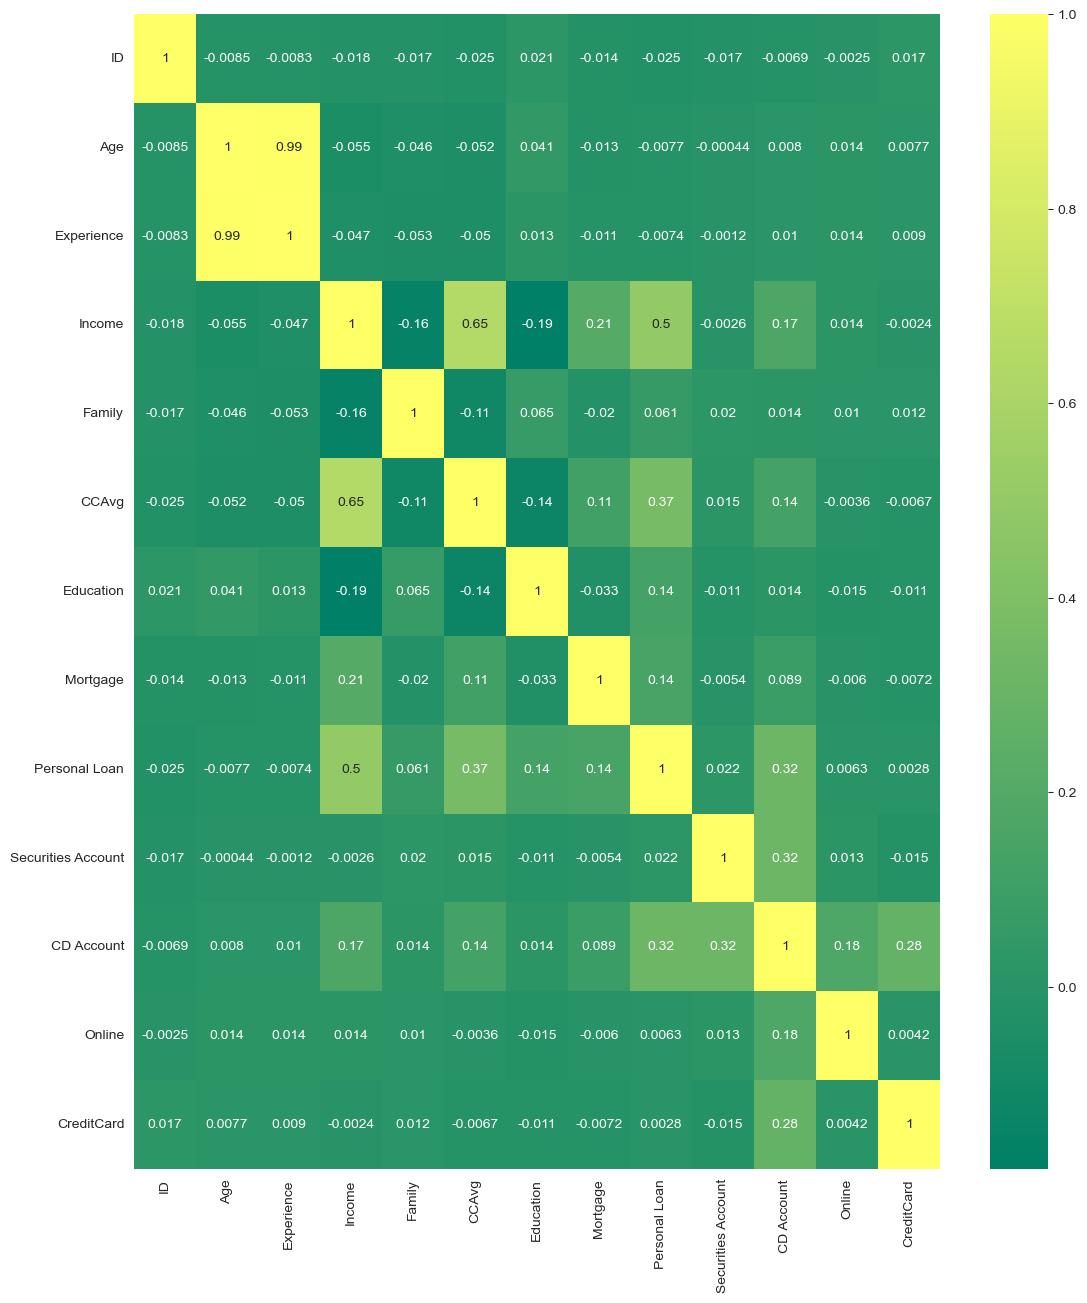

In [101]:
cor= dd.corr(method='pearson')
plt.figure(figsize=(13,15))
sns.heatmap(cor, cmap='summer',annot=True)

Here "Income" under Personal Loan (target) , CCAvg , CD Account are showing good results.

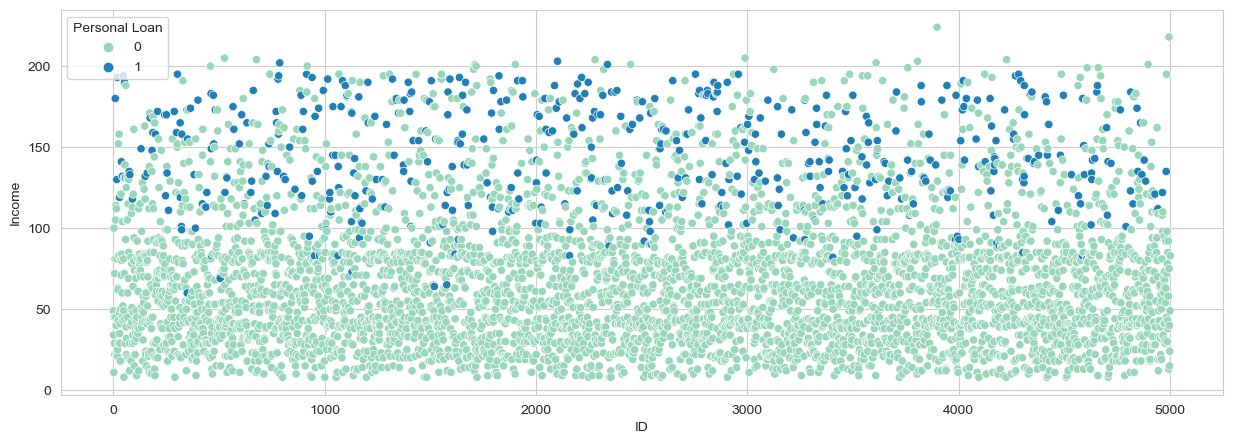

In [102]:

plt.figure(figsize=(15,5))
sns.scatterplot(x = "ID", y = "Income", data=dd, hue = "Personal Loan", palette="YlGnBu", alpha = 1);

Plot shows the income of those who received loan and those who did not. Good idea is to give loans to people with high incomes.                             

<AxesSubplot:>

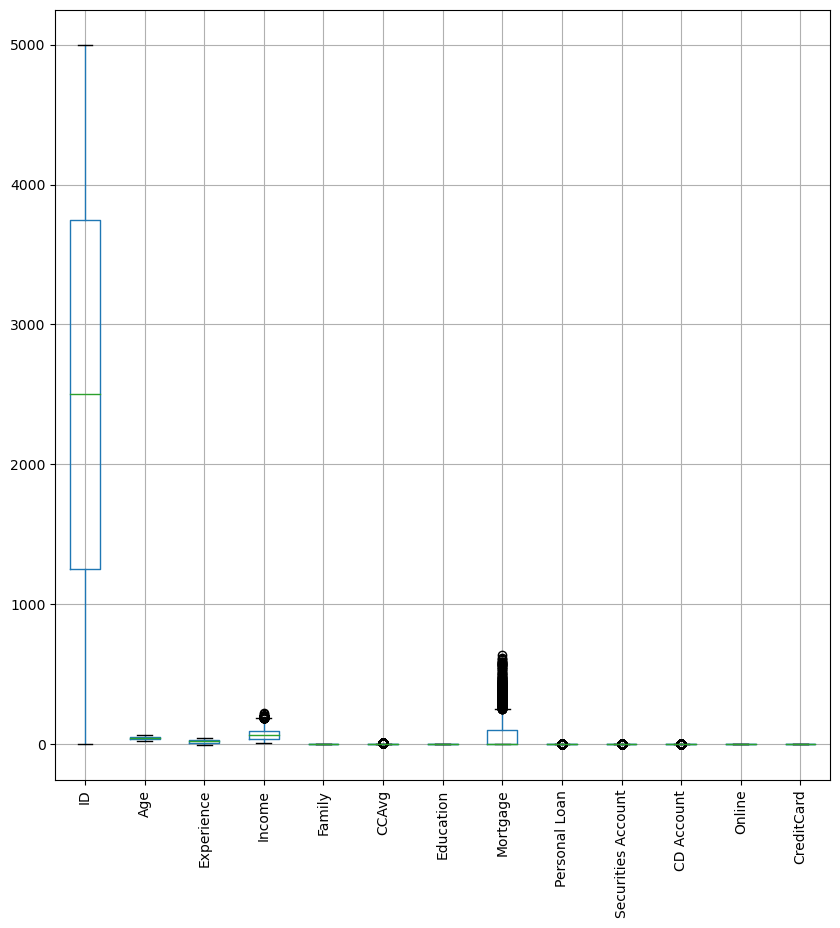

In [21]:
dd.boxplot(figsize=(10,10),rot=90)


In [103]:
abc=dd["Income"]

In [23]:
outliers=[]
def detect_outlier(lc):
    threshold=3
    mean=np.mean(lc)
    std=np.std(lc)
    
    for i in lc:
        z_score=(i-mean)/std
        if np.abs(z_score)>threshold:
            outliers.append(i)
    return outliers

out1=detect_outlier(abc)
out1

[224, 218]

In [24]:
len(out1)

2

# Model on training data

In [104]:
x=dd.drop(columns="Personal Loan")
y=dd["Personal Loan"]

In [112]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8)

In [113]:
print(x_train.shape,x_test.shape)

(4000, 12) (1000, 12)


In [114]:
print(y_train.shape,y_test.shape)

(4000,) (1000,)


In [115]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


In [116]:
models = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), GradientBoostingClassifier(), AdaBoostClassifier(), KNeighborsClassifier(), SVC(), GaussianNB()]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'Ada Boost', 'KNN', 'SVC', 'Naive Bayes']
accuracy = []
roc_auc = []

for i in models:
    i.fit(x_train, y_train)
    y_pred = i.predict(x_test)
    accuracy.append(accuracy_score(y_test, y_pred))
    roc_auc.append(roc_auc_score(y_test, y_pred))

model_comparison = pd.DataFrame({'Model': model_names, 'Accuracy': accuracy, 'ROC AUC': roc_auc})
model_comparison.sort_values(by='Accuracy', ascending=False)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid thi

,Model,Accuracy,ROC AUC
2,Random Forest,0.985,0.934020
3,Gradient Boosting,0.985,0.946358
1,Decision Tree,0.972,0.930854
4,Ada Boost,0.970,0.880378
0,Logistic Regression,0.933,0.756837
7,Naive Bayes,0.897,0.773697
6,SVC,0.893,0.500000
5,KNN,0.885,0.548990


# 1 Logistic Regression

In [117]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

In [118]:
lg.fit(x_train,y_train)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [119]:
y_pred=lg.predict(x_test)

In [120]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [121]:
acc = accuracy_score(y_test, y_pred);acc

0.933

In [122]:
cf = confusion_matrix(y_pred,y_test)
cf

array([[876,  50],
       [ 17,  57]], dtype=int64)

In [123]:
ac=cf.diagonal().sum()/cf.sum()*100
ac

93.30000000000001

In [124]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96       926
           1       0.53      0.77      0.63        74

    accuracy                           0.93      1000
   macro avg       0.76      0.86      0.80      1000
weighted avg       0.95      0.93      0.94      1000



Model accuracy : 0.933

The closer the value of the F1 score is to 1.0, the better the expected performance of the model.

In [137]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report, mean_squared_error

In [138]:
yy_pred=lg.predict(x_train)

 training the LReg model and look at performance on train data

In [139]:
print("Root Mean Squared Error (RMSE): ", round(mean_squared_error(y_train, yy_pred) ** 0.5, 4))
print("F1 Score: ",f1_score(y_train, yy_pred))

Root Mean Squared Error (RMSE):  0.2308
F1 Score:  0.6707882534775889


performance of LReg on test data

In [140]:
y_pred = lg.predict(x_test)

print("Root Mean Squared Error (RMSE): ", round(mean_squared_error(y_test, y_pred) ** 0.5, 4))
print("F1 Score: ",f1_score(y_test, y_pred))

Root Mean Squared Error (RMSE):  0.2588
F1 Score:  0.6298342541436464


# 2 Decision Tree

In [141]:
from sklearn.tree import DecisionTreeClassifier 

In [142]:
model = DecisionTreeClassifier()

In [143]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [144]:
pred = model.predict(x_test)

In [145]:
acc = accuracy_score(y_test, pred);acc

0.976

In [146]:
cf1 = confusion_matrix(pred,y_test)
cf1

array([[880,  11],
       [ 13,  96]], dtype=int64)

In [147]:
ac=cf1.diagonal().sum()/cf1.sum()*100
ac

97.6

In [148]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       891
           1       0.90      0.88      0.89       109

    accuracy                           0.98      1000
   macro avg       0.94      0.93      0.94      1000
weighted avg       0.98      0.98      0.98      1000



Model Accuracy : 0.976

# 3.Random Forest

In [149]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [150]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [151]:
pred2 = rf.predict(x_test)

In [153]:
acc = accuracy_score(y_test, pred2);acc

0.988

In [154]:
cf2 = confusion_matrix(pred2,y_test)
cf2

array([[892,  11],
       [  1,  96]], dtype=int64)

In [155]:
acc2 = cf2.diagonal().sum()/cf2.sum()*100
acc2

98.8

In [156]:
print(classification_report(pred2,y_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       903
           1       0.90      0.99      0.94        97

    accuracy                           0.99      1000
   macro avg       0.95      0.99      0.97      1000
weighted avg       0.99      0.99      0.99      1000



Model Accuracy : 0.988

# 4.KNN

In [165]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_jobs=2)

In [166]:
knn_base = KNeighborsClassifier(n_neighbors=5)
knn_base.fit(x_train, y_train)
knn_base.score(x_test,y_test)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.957

In [167]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test) 

In [168]:
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(x_train, y_train)  

KNeighborsClassifier()

In [169]:
pred4= classifier.predict(x_test)  

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [175]:
from sklearn.metrics import confusion_matrix  
cm=confusion_matrix(y_test, pred4);cm

array([[892,   1],
       [ 42,  65]], dtype=int64)

In [176]:
acc = cm.diagonal().sum()/cm.sum()*100
acc

95.7

In [174]:
acc = accuracy_score(y_test, pred4);acc

0.957

Model accuracy  : 0.957

# 5.SVC

In [177]:
SVC = SVC()
SVC.fit(x_train ,y_train)

SVC()

In [178]:
pred5 = SVC.predict(x_test)

In [179]:
acc=accuracy_score(y_test,pred5);acc

0.977

In [180]:
cf2 = confusion_matrix(pred5,y_test)
cf2

array([[892,  22],
       [  1,  85]], dtype=int64)

In [182]:
acc = cf2.diagonal().sum()/cf2.sum()*100
acc

97.7

In [183]:
print(classification_report(pred5,y_test))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       914
           1       0.79      0.99      0.88        86

    accuracy                           0.98      1000
   macro avg       0.90      0.98      0.93      1000
weighted avg       0.98      0.98      0.98      1000



Model Accuracy : 0.977

# 6 Naive bayes

In [184]:
accuracies = {}
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)


GaussianNB()

In [185]:
acc = nb.score(x_test,y_test)*100
accuracies['Naive Bayes'] = acc
print("Accuracy of Naive Bayes: {:.2f}%".format(acc))
print('Train accuracy is :', nb.score(x_train, y_train) * 100)

y_prednb= nb.predict(x_test)

Accuracy of Naive Bayes: 89.60%
Train accuracy is : 88.44999999999999


We prefer to use the RandomForestClassifier model in this project. Because it works with 98.8%  accuracy, which is better than the rest.

  # Combining Model

In [186]:
accuracies={ 'Naive Bayes': 89.6,'SVM': 97.7,'knn':95.7, 'RF': 98.8, 'DT': 97.6,"LReg":93.3}

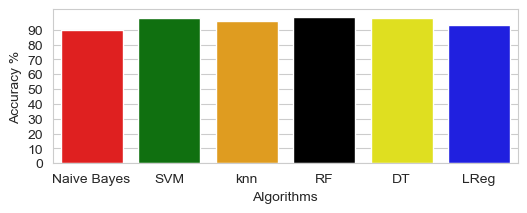

In [189]:

colors = ["Red", "green", "orange", "black", "yellow","blue"]

sns.set_style("whitegrid")
plt.figure(figsize=(6,2))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

# Conclusion

Among the proposed models we observed that the Random Forest gives 98.80% accuracy which is the highest among all the models.

Income (independent variable) is highly correlated with (target variable) personal loan.